# Abstract
This notebook is to show a module which acts exactly same as the partner selection procedures of the paper : https://www.econstor.eu/bitstream/10419/147450/1/870932616.pdf

# 1. Introduction

**This notebook follows the structure below.**
<ol> 
    <li>Brief introduction of the modules</li>
    <li>Import Data</li>
    <li>Data Preprocessing</li>
    <li>Four ways of partner selection</li>
    <li>Conclusion</li>
</ol>

For the showcasing purpose, I'll be presenting how to use the module with an example data of S&P 500 stocks.

In [351]:
%load_ext autoreload

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from data_handler import *
from partner_selector import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Body

## (1) Brief Introduction of the Modules
This module provides four different ways of partner selection procedures at the Initialization Period. With one target stock and its three suitable partners, all four stocks form the quadruple Q. Therefore using this module, one may create an (n x 4) output matrix, where n is the number of the stocks.

## (2) Import Data
Here, I’ll be using stocks of S&P 500 constituents of Feb, 2021. According to the paper I am referring, it uses data from January 1990 until October 2015 and slice the data set in 281 overlapping study periods which are also consist of a twelve-month initialization, a twelve-month formation, and a six-month out-of-sample trading period. In particular, the Partner Selection module is used in the initialization period. In this notebook, I’ll show how to use this module for a one initialization period, from Jan 2020 until Jan 2021.

In [39]:
ID = ImportData()
# Get the list of s&p 500 from Wikipedia
ticker_list = ID.get_list_sp500()
# Download the data
price_data = ID.download_data(ticker_list, 
                              start_date='2020-01-31', 
                              end_date='2021-01-31')
return_data = ID.get_returns(price_data)

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


## (2) Data Preprocessing
First, save the downloaded stock data and import it again. To follow this notebook, one may start from the part where I import data from my csv file.

In [66]:
# Drop out the columns which contains various NAs to avoid errors
na_cols = return_data.columns[return_data.iloc[1:,:].isna().sum()!=0]
return_df = return_data.drop(na_cols,axis=1).dropna()
# Save the downloaded data to avoid unnecessary downloads in the future
return_df.to_csv('data/stocks.csv')

In [77]:
# Import the data
return_df = pd.read_csv('data/stocks.csv')
return_df = return_df.set_index('Date')

In the paper by Stubinger, Johannes, they used the ranks of the daily discrete returns for the calculations. Also for computational efficiency, they only considered top 50 most highly correlated stocks. Therefore, here, I’ll use only 50 most correlated stocks and get a correlation matrix of those.

In [87]:
# Preprocess Data
DP = DataPreprocess()
# Get rank
rank_df = DP.get_rank(return_df)
# Select top 50 most highly correlated stocks
top_rank_df, top_rank_corr_df = DP.most_correlated_stocks(rank_df, 50)

In [89]:
top_rank_df.head()

,GOOG,GOOGL,UA,UAA,FOXA,FOX,NWS,NWSA,PRU,MET,...,NCLH,FRT,REG,PNC,C,UNM,CCL,ESS,NSC,CSX
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,49.0,48.0,45.0,47.0,133.0,109.0,93.0,103.0,57.0,44.0,...,91.0,118.0,112.0,63.0,38.0,54.0,68.0,96.0,24.0,44.0
2020-02-03,240.0,237.0,129.0,138.0,181.0,177.0,130.0,116.0,148.0,157.0,...,146.0,131.0,126.0,152.0,163.0,164.0,92.0,159.0,92.0,171.0
2020-02-04,26.0,26.0,184.0,183.0,177.0,183.0,160.0,171.0,191.0,167.0,...,157.0,185.0,175.0,157.0,190.0,182.0,172.0,130.0,213.0,161.0
2020-02-05,115.0,113.0,136.0,114.0,188.0,179.0,196.0,206.0,193.0,207.0,...,148.0,159.0,177.0,200.0,211.0,248.0,164.0,107.0,166.0,146.0
2020-02-06,215.0,221.0,106.0,113.0,23.0,24.0,215.0,217.0,116.0,149.0,...,132.0,149.0,137.0,99.0,135.0,59.0,120.0,197.0,120.0,127.0


In [322]:
top_rank_corr_df.head()

,GOOG,GOOGL,UA,UAA,FOXA,FOX,NWS,NWSA,PRU,MET,...,NCLH,FRT,REG,PNC,C,UNM,CCL,ESS,NSC,CSX
GOOG,1.000000,0.995046,0.334623,0.327914,0.364380,0.385050,0.461101,0.439234,0.390566,0.389348,...,0.277553,0.345388,0.388054,0.382793,0.401216,0.332959,0.289345,0.450120,0.480949,0.520022
GOOGL,0.995046,1.000000,0.337043,0.330716,0.364118,0.386097,0.461530,0.438013,0.392818,0.390348,...,0.276286,0.349570,0.393338,0.381063,0.398604,0.330591,0.290814,0.452510,0.488842,0.529787
UA,0.334623,0.337043,1.000000,0.988979,0.520437,0.551255,0.521044,0.483053,0.729287,0.697590,...,0.641970,0.659115,0.655433,0.681626,0.674256,0.720183,0.675186,0.563362,0.583050,0.606192
UAA,0.327914,0.330716,0.988979,1.000000,0.500898,0.534560,0.519627,0.481617,0.711708,0.683092,...,0.634798,0.654902,0.643428,0.666747,0.661336,0.704547,0.663069,0.548118,0.571306,0.590493
FOXA,0.364380,0.364118,0.520437,0.500898,1.000000,0.987380,0.587536,0.587006,0.618065,0.599551,...,0.474753,0.556051,0.583635,0.616520,0.608622,0.605386,0.483196,0.472725,0.501203,0.534569


#### Below is the correlation heatmap of the top 50 correlated stocks

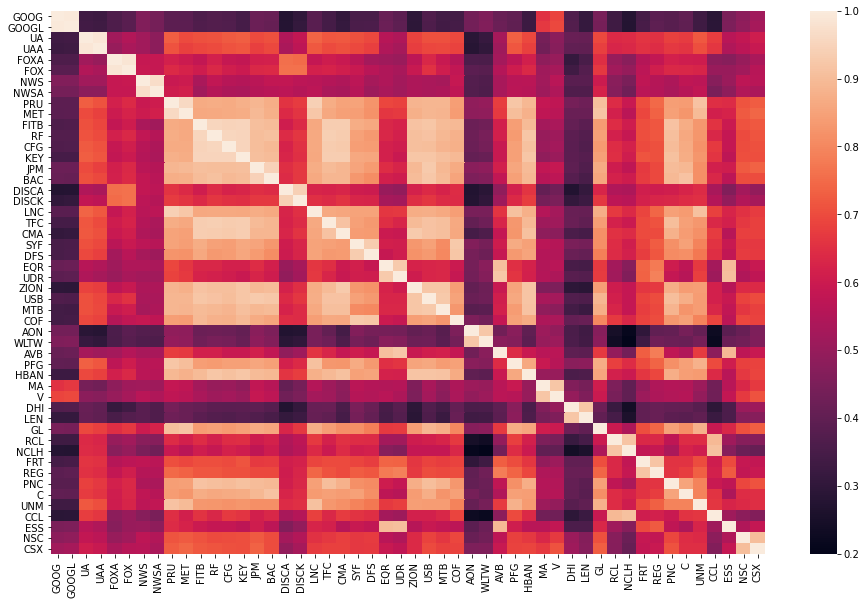

In [332]:
plt.figure(figsize=(16, 10))
sns.heatmap(top_rank_corr_df);

## (3) Four ways of partner selection

Now, we'll discuss more about four different ways of partner selection procedures.

### (3-1) Traditional Approach
For demonstration purpose, instead of using 50 stocks, we'll be using top 20 stocks to reduce computational time

In [348]:
demo_df = top_rank_df.iloc[:,:20]

In [352]:
# Create an instance of SelectPartner with a rank dataframe
SP = SelectPartner(demo_df)
# Choose a method to use for partner selection
Q_traditional = SP.get_partner(method='traditional')

100%|██████████| 20/20 [00:11<00:00,  1.69it/s]


In [359]:
# These are the output Q matrix
demo_Q_list = Q_traditional[-1]
Q_traditional[-5:]

[['BAC', 'FITB', 'RF', 'KEY'],
 ['DISCA', 'FOXA', 'FOX', 'DISCK'],
 ['DISCK', 'FOXA', 'FOX', 'DISCA'],
 ['LNC', 'PRU', 'MET', 'JPM'],
 ['TFC', 'FITB', 'RF', 'KEY']]

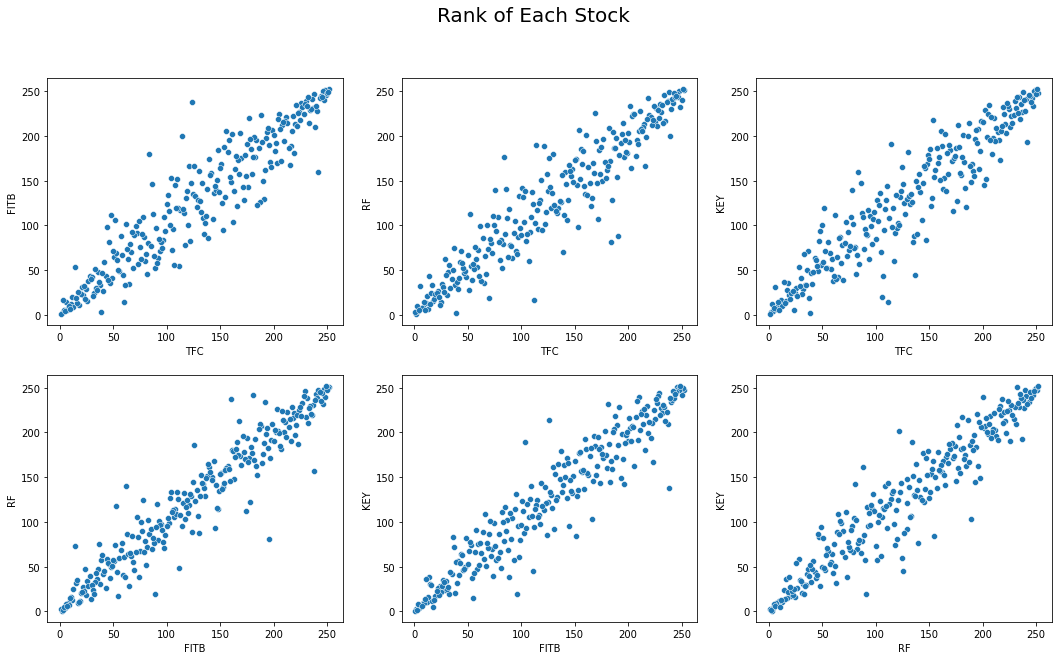

In [364]:
# To see the relation of the stocks, we randomly select the last row of 
# the Q matrix and plot it as below.
# You can see that they are highly correlated
SP.plot_scatters(demo_Q_list)

### (3-2) Extended Approach
There are three different estimators for extended methods. One can choose in between those three by add 'extended_rho' argument in 'get_partner' function.

In [365]:
# Create an instance of SelectPartner with a rank dataframe
SP = SelectPartner(demo_df)
# Choose a method to use for partner selection
Q_extended = SP.get_partner(method='extended')

100%|██████████| 20/20 [09:01<00:00, 27.06s/it]


In [373]:
# These are the output Q matrix
demo_Q_list = Q_extended[-1]
Q_extended[-5:]

[['BAC', 'NWS', 'NWSA', 'DISCK'],
 ['DISCA', 'NWS', 'NWSA', 'DISCK'],
 ['DISCK', 'FOXA', 'NWS', 'NWSA'],
 ['LNC', 'NWS', 'NWSA', 'DISCK'],
 ['TFC', 'NWS', 'NWSA', 'DISCK']]

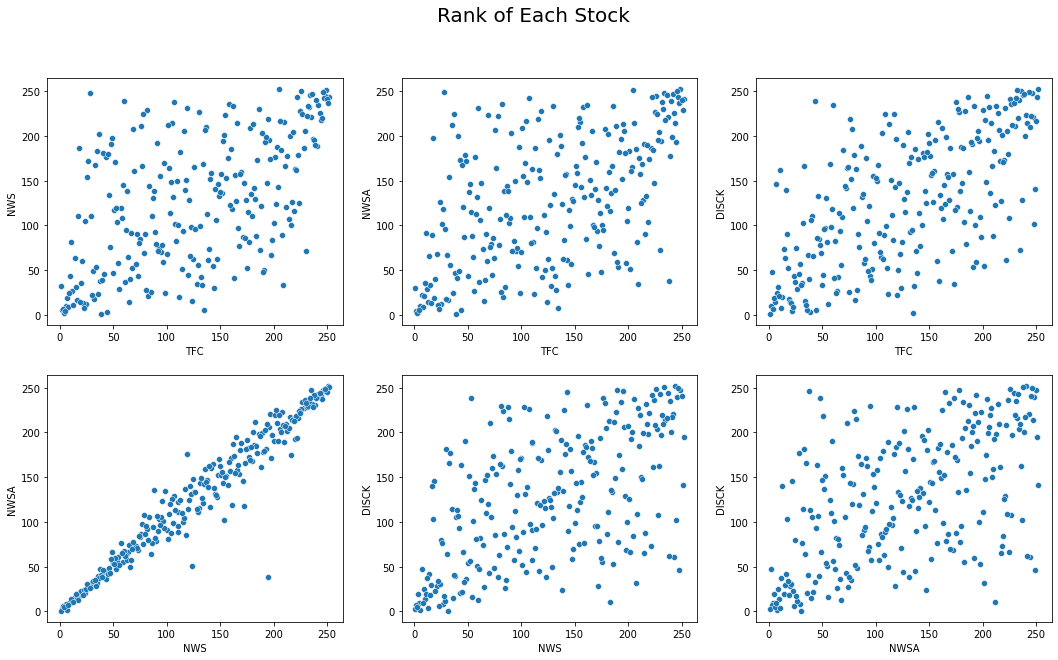

In [374]:
# To see the relation of the stocks, we randomly select the last row of 
# the Q matrix and plot it as below.
# It may not seem like correlated but as it is multi-dimensional extension
# of spearman's rho, it might be hard to tell in 2-D graph.
SP.plot_scatters(demo_Q_list)

### (3-3) Geometric Approach

In [375]:
# Create an instance of SelectPartner with a rank dataframe
SP = SelectPartner(demo_df)
# Choose a method to use for partner selection
Q_geometric = SP.get_partner(method='geometric')

100%|██████████| 20/20 [01:22<00:00,  4.10s/it]


In [376]:
# These are the output Q matrix
demo_Q_list = Q_geometric[-1]
Q_geometric[-5:]

[['BAC', 'FITB', 'RF', 'KEY'],
 ['DISCA', 'FOXA', 'FOX', 'DISCK'],
 ['DISCK', 'FOXA', 'FOX', 'DISCA'],
 ['LNC', 'PRU', 'MET', 'JPM'],
 ['TFC', 'FITB', 'RF', 'KEY']]

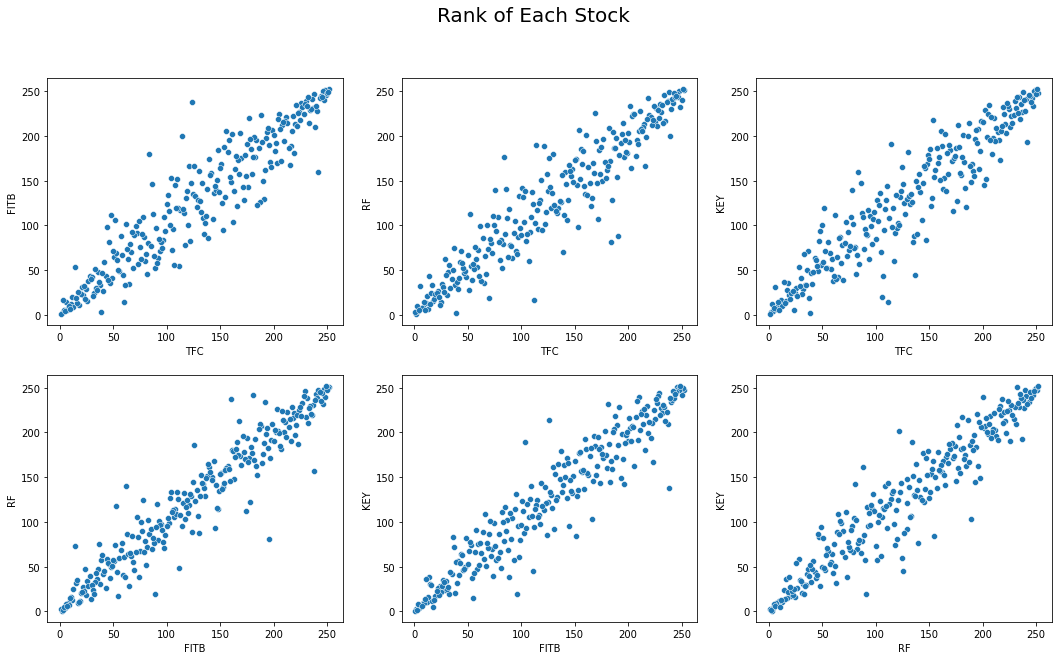

In [378]:
# To see the relation of the stocks, we randomly select the last row of 
# the Q matrix and plot it as below.
# You can see that they are highly correlated as in traditional approach
# as it uses euclidean distance to calculate correlation
SP.plot_scatters(demo_Q_list)

### (3-4) Extremal Approach
Still under development

# 3. Conclusion

As mentioned in the paper, it is very important to tell the differences between the four approaches and choose the right one for our future model. Except the extremal approach, other three approaches focus on finding the quadruple which acts as linearly as possible. However the extremal approach(which I haven’t developed yet) tries to maximize the distance to independence with focus on the joint extreme observations.